<h3>Purpose</h3>
<br>
The purpose of this project is to train a SOM to cluster and classify the IRIS dataset. As a benchmark against classification, the SOM will compete with a simple decision tree.  

In [1]:
'Required imports'
import os
import numpy as np
import scipy.io as sio             
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import plot,axis,show,pcolor,colorbar,bone

'The Ai-modules'
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing  # Data preprocessing
from minisom import MiniSom        # SOM toolbox

In [2]:
'Import Iris dataset'
from sklearn import datasets
IRIS = datasets.load_iris()
print(IRIS.DESCR)

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**SOM**  
The below code creates the SOM and outputs the classification accuracy.  

In [3]:
import math

def plot_legend():

    # Basis vectors for triangle
    basis = np.array([[0.0, 1.0], [-1.5/np.sqrt(3), -0.5],[1.5/np.sqrt(3), -0.5]])

    fig = plt.figure()
    ax = fig.add_subplot(111,aspect='equal')

    # Plot points
    a, b, c = np.mgrid[0.0:1.0:50j, 0.0:1.0:50j, 0.0:1.0:50j]
    a, b, c = a.flatten(), b.flatten(), c.flatten()
    abc = np.dstack((a,b,c))[0]
    abc = map(lambda x: x/sum(x), abc)

    data = np.dot(abc, basis)
    colours = [abc_to_rgb(A=point[0],B=point[1],C=point[2]) for point in abc]

    ax.scatter(data[:,0], data[:,1],marker=',',edgecolors='none',facecolors=colours)

    # Plot triangle
    ax.plot([basis[_,0] for _ in range(3) + [0,]],[basis[_,1] for _ in range(3) + [0,]],**{'color':'black','linewidth':3})

    # Plot labels at vertices
    offset = 0.25
    fontsize = 32
    ax.text(basis[0,0]*(1+offset), basis[0,1]*(1+offset), '$A$', horizontalalignment='center',
            verticalalignment='center', fontsize=fontsize)
    ax.text(basis[1,0]*(1+offset), basis[1,1]*(1+offset), '$B$', horizontalalignment='center',
            verticalalignment='center', fontsize=fontsize)
    ax.text(basis[2,0]*(1+offset), basis[2,1]*(1+offset), '$C$', horizontalalignment='center',
            verticalalignment='center', fontsize=fontsize)    

    ax.set_frame_on(False)
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

def Train_and_Plot_SOM(dimensions, inputData, steps):
    dimensions = np.array(dimensions)
    inputData = np.transpose(inputData)
    # Create SOM
    som = MiniSom(
        int(dimensions[0]),                                # Number of neurons (x-axis)
        int(dimensions[1]),                                # Number of neurons (y-axis)
        np.shape(inputData)[1],             # Number of elements in an input vector
        sigma = .9,                        # Spread of the neighbourhood function
        learning_rate = 0.5,                # Initial learning rate
        neighborhood_function = 'gaussian'  # Type of neighborhood function
    )

    som.random_weights_init(inputData)  # Initialize weights of neurons randomly
    som.train_random(inputData, steps)  # Train the SOM using the input vectors in a random order 

    # Plot distance map of the SOM

    t = IRIS.target
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(1, 1, 1)
    plt.bone()
    plt.pcolor(som.distance_map().T, cmap='Greys')
    bar = plt.colorbar()
    bar.set_label('Neuron Distance')
    
    # use different colors and markers for each label
    markers = ['o', 's', '^']
    colors = ['y', 'b', 'g']
    labels = ['Iris Sentosa', 'Iris Versicolor', 'Iris Virginica']
    counter = [ False, False, False]
    w_class = np.zeros([dimensions[0], dimensions[1], 3])
    for cnt, xx in enumerate(inputData):
        w = som.winner(xx)  # getting the winner
        w_class[w[0], w[1], t[cnt]] +=1
        
        # place a marker on the winning position for the sample xx
        if counter[t[cnt]] == False:
            ax.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
                     markeredgecolor=colors[t[cnt]], markersize=5, markeredgewidth=2, label=labels[t[cnt]])
            counter[t[cnt]] = True
        else:
            ax.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
                 markeredgecolor=colors[t[cnt]], markersize=5, markeredgewidth=2)
    ax.axis([0, dimensions[0], 0, dimensions[1]])
    ax.legend(loc=2, mode='expand', numpoints=1, ncol=4, fancybox = True)
    plt.title(''.join([str(dimensions[0]), 'x' ,str(dimensions[1]),  ' SOM, after ' , str(steps) ,' training steps']))
    plt.show()

    
    Class_acc = np.sum(np.amax(w_class, 2)) / np.sum(w_class)
    print("classification Accuracy: ", Class_acc)



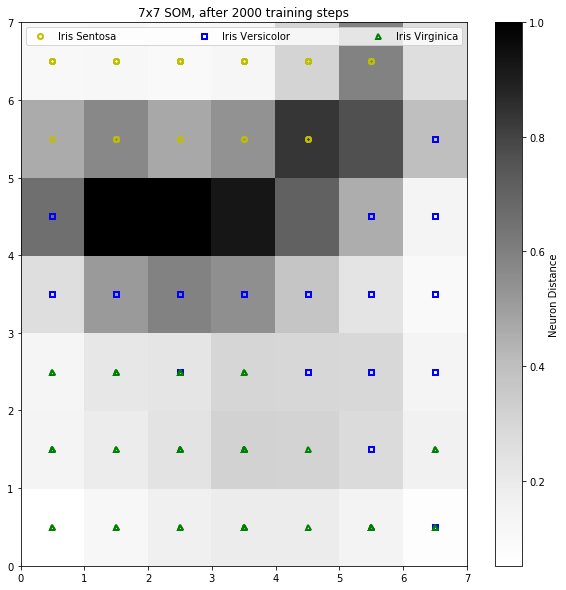

classification Accuracy:  0.9866666666666667


In [6]:
# call the function to plot SOM
SepalLength = IRIS.data[:,0]
SepalWidth = IRIS.data[:,1]
PetalLength = IRIS.data[:,2]
PetalWidth = IRIS.data[:,3]
Train_and_Plot_SOM(dimensions=[7, 7], inputData=[PetalWidth, SepalLength,SepalWidth, PetalLength], steps=2000)


**Decision Tree**  
Below code creates the simple decision tree and outputs the classification accuracy. 

This Decision tree's accuracy is:  0.96


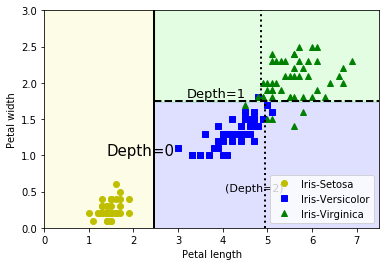

In [5]:
'Building a Decision Tree'

Benchmark_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
Benchmark_tree.fit(IRIS.data[:,2:], IRIS.target)
print("This Decision tree's accuracy is: ", Benchmark_tree.score(IRIS.data[:,2:], IRIS.target))

'Plotting the Decision boundaries'
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")

plot_decision_boundary(Benchmark_tree, IRIS.data[:,2:], IRIS.target)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.legend()

plt.show()
